In [2]:
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import numpy as np
#import pkg_resources
#import types
#def get_imports():
#    for name, val in globals().items():
#        if isinstance(val, types.ModuleType):
#            # Split ensures you get root package, 
#            # not just imported function
#            name = val.__name__.split(".")[0]
#
#        elif isinstance(val, type):
#            name = val.__module__.split(".")[0]
#
#        # Some packages are weird and have different
#        # imported names vs. system/pip names. Unfortunately,
#        # there is no systematic way to get pip names from
#        # a package's imported name. You'll have to had
#        # exceptions to this list manually!
#        poorly_named_packages = {
#            "PIL": "Pillow",
#            "sklearn": "scikit-learn"
#        }
#        if name in poorly_named_packages.keys():
#            name = poorly_named_packages[name]
#
#        yield name
#imports = list(set(get_imports()))
## The only way I found to get the version of the root package
## from only the name of the package is to cross-check the names 
## of installed packages vs. imported packages
#requirements = []
#for m in pkg_resources.working_set:
#    if m.project_name in imports and m.project_name!="pip":
#        requirements.append((m.project_name, m.version))
#
#for r in requirements:
#    print("{}=={}".format(*r))

pandas==0.24.2
numpy==1.15.0
requests==2.18.4
matplotlib==2.1.1


In [205]:
#Country = "United States"
#Country="Germany"
#Country="China"
#Country="Australia"
Country="Nigeria"
url="http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/"+Country.lower().replace(" ", "-")+"-TAVG-Trend.txt"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')),delim_whitespace=True, skiprows=69, header=None)


In [206]:
c.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1856,1,-0.303,1.082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1856,2,-1.173,1.621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1856,3,-0.666,1.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1856,4,-0.669,0.985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1856,5,-0.887,1.198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:

for k in range(0,12):
    if c.iloc[k,1]==1 :
              
        print(k)
        monthly_temp= c.iloc[k:,0:4]
        monthly_temp.columns = ['Year','Month','Anomaly','Uncertainty']
        
        break 
    else:
        k += 1
    
monthly_temp.head()

0


,Year,Month,Anomaly,Uncertainty
0,1856,1,-0.303,1.082
1,1856,2,-1.173,1.621
2,1856,3,-0.666,1.015
3,1856,4,-0.669,0.985
4,1856,5,-0.887,1.198


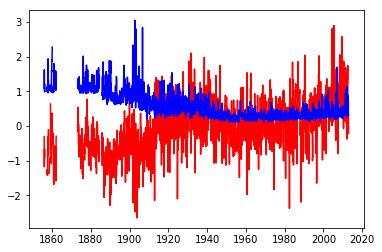

In [208]:



years = np.linspace(monthly_temp.Year.min(),monthly_temp.Year.max() , num=monthly_temp.shape[0])
plt.plot(years,monthly_temp.Anomaly,'r')
plt.plot(years,monthly_temp.Uncertainty,'b')




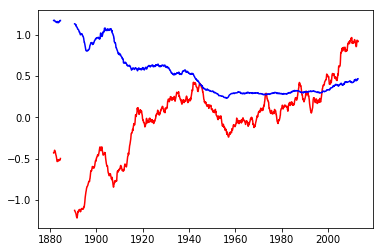

In [209]:

rolling_mean_anomaly = monthly_temp.Anomaly.rolling(window=60).mean()
rolling_mean_uncertainty = monthly_temp.Uncertainty.rolling(window=60).mean()
years = np.linspace(monthly_temp.Year.min(),monthly_temp.Year.max() , num=monthly_temp.shape[0])
plt.plot(years,rolling_mean_anomaly,'r')
plt.plot(years,rolling_mean_uncertainty,'b')



Text(0.5,1,' Temperatures anomalies relative to the Jan 1951-Dec 1980 average for Nigeria')

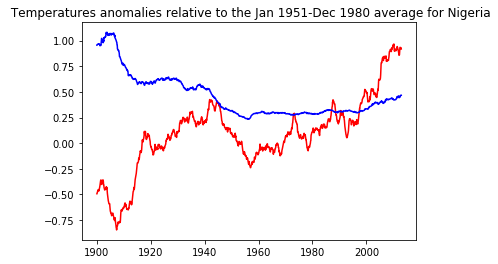

In [215]:
plt.plot(years[years>1900],rolling_mean_anomaly[years>1900],'r')
plt.plot(years[years>1900],rolling_mean_uncertainty[years>1900],'b')
plt.title(" Temperatures anomalies relative to the Jan 1951-Dec 1980 average for "+ Country)